In [ ]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
# Подключаемся к БД
con = sqlite3.connect(
    'Здесь находится путь к уже созданной БД либо создаём новую БД',
    timeout=10
)
cur = con.cursor()

In [ ]:
# считываем файл csv с таблицей data salaries
df_main = pd.read_csv(
    'https://raw.githubusercontent.com/sergigusev/Datasets/main/data_salaries.csv',
    sep=','
)

In [ ]:
# считываем файл csv с таблицей кодов (ISO 3166) по странам
df_iso = pd.read_csv(
    'https://raw.githubusercontent.com/sergigusev/Datasets/main/ISO%203166%20country%20code.csv',
    sep=','
)

In [ ]:
# Переименовываем значения в атрибуте experience_level
exp_change = {'EN': 'Entry-level',
              'MI': 'Mid-level',
              'SE': 'Senior-level',
              'EX': 'Executive-level'}
df_main['experience_level'] = df_main['experience_level'].replace(exp_change)

# Переименовываем значения в атрибуте employment_type
emp_change = {'PT': 'Part-time',
              'FT': 'Full-time',
              'CT': 'Contract',
              'FL': 'Freelance'}
df_main['employment_type'] = df_main['employment_type'].replace(emp_change)

# Переименовываем значения в атрибуте remote_ratio
remote_change = {0: 'No Remote Work',
                 50: 'Partially Remote/Hybrid',
                 100: 'Fully Remote'}
df_main['remote_ratio'] = df_main['remote_ratio'].replace(remote_change)

# Переименовываем значения в атрибуте company_size
size_change = {'S': 'Small(Less than 50 Employees)',
               'M': 'Medium(50 to 250 Employees)',
               'L': 'Large(More than 250 Employees)'}
df_main['company_size'] = df_main['company_size'].replace(size_change)

In [ ]:
# Переименовываем значения в атрибутах employee_residence и company_location
# Для этого используем другой csv файл с расшифровкой кодов (ISO 3166) по странам
# Создаём словарь, где ключ - код страны, а значение - название страны
# Далее заменяем значения в атрибутах
country_change = {
    country_code: country_name for country_code, country_name in zip(
        df_iso['alpha-2'],
        df_iso['name']
)}
df_main['employee_residence'] = df_main['employee_residence'].replace(country_change)
df_main['company_location'] = df_main['company_location'].replace(country_change)

In [ ]:
# Запускаем датасет data_salaries в БД
df_main.to_sql(con=con, name='data_salaries', index=False, if_exists='replace')

8691

In [ ]:
# Запускаем датасет iso_code в БД
df_iso.to_sql(con=con, name='iso_code', index=False, if_exists='replace')

249

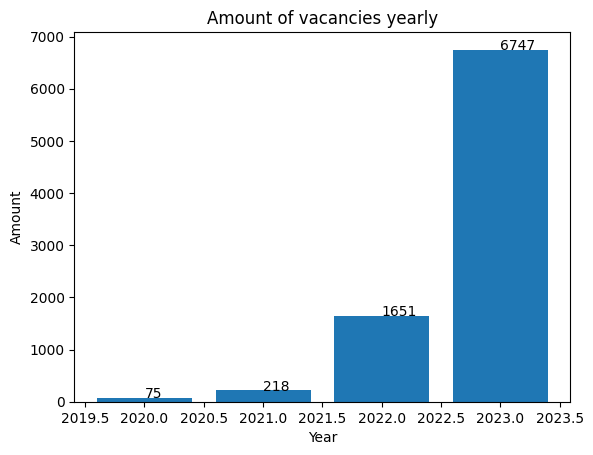

In [ ]:
#визуаллизация задачи 1
sql_amount_of_vacancies_yearly = pd.read_sql_query(
    '''SELECT
    work_year,
    COUNT(*) AS amount_of_vacancies
    FROM data_salaries ds
    GROUP BY work_year
    ORDER BY amount_of_vacancies DESC''',
    con
)
plt.bar(
    sql_amount_of_vacancies_yearly['work_year'],
    sql_amount_of_vacancies_yearly['amount_of_vacancies']
)
for key, value in zip(
    sql_amount_of_vacancies_yearly['work_year'],
    sql_amount_of_vacancies_yearly['amount_of_vacancies']
):
    plt.text(key, value, str(value))
plt.xlabel('Year')
plt.ylabel('Amount')
plt.title('Amount of vacancies yearly')
plt.show()

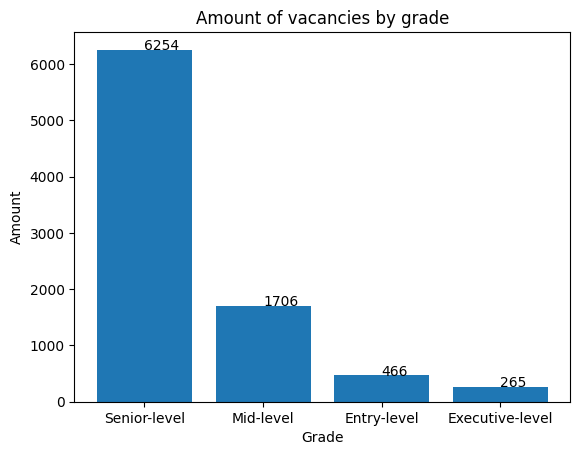

In [ ]:
#визуализация задачи 2
sql_amount_of_vacancies_by_experience_level = pd.read_sql_query(
    '''SELECT
    experience_level,
    COUNT(*) AS amount_of_vacancies_by_grade
    FROM data_salaries ds
    GROUP BY experience_level
    ORDER BY amount_of_vacancies_by_grade DESC''',
    con
)
plt.bar(
    sql_amount_of_vacancies_by_experience_level['experience_level'],
    sql_amount_of_vacancies_by_experience_level['amount_of_vacancies_by_grade']
)
for key, value in zip(
    sql_amount_of_vacancies_by_experience_level['experience_level'],
    sql_amount_of_vacancies_by_experience_level['amount_of_vacancies_by_grade']
):
    plt.text(key, value, str(value))
plt.xlabel('Grade')
plt.ylabel('Amount')
plt.title('Amount of vacancies by grade')
plt.show()

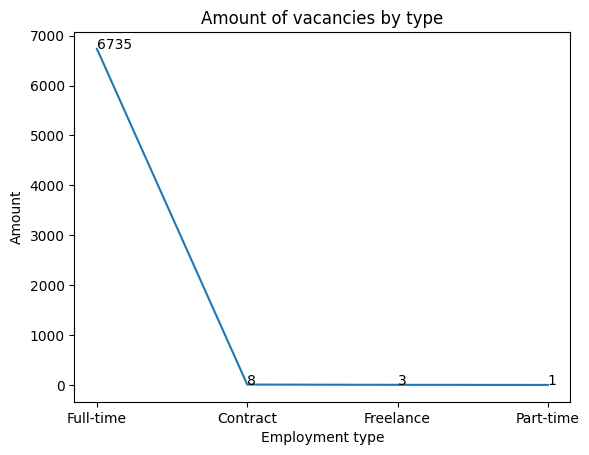

In [ ]:
#Визуализация задачи 3
sql_amount_of_vacancies_by_type = pd.read_sql_query(
    '''SELECT
    employment_type,
    COUNT(*) AS amount_of_vacancies_by_type
    FROM data_salaries ds
    WHERE work_year = '2023'
    GROUP BY employment_type
    ORDER BY amount_of_vacancies_by_type DESC''',
    con
)
plt.plot(
    sql_amount_of_vacancies_by_type['employment_type'],
    sql_amount_of_vacancies_by_type['amount_of_vacancies_by_type']
)
for key, value in zip(
    sql_amount_of_vacancies_by_type['employment_type'],
    sql_amount_of_vacancies_by_type['amount_of_vacancies_by_type']
):
    plt.text(key, value, str(value))
plt.xlabel('Employment type')
plt.ylabel('Amount')
plt.title('Amount of vacancies by type')
plt.show()

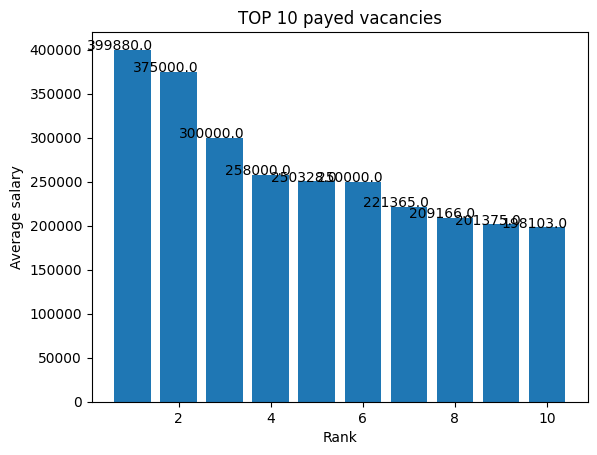

In [ ]:
#Визуализация задачи 4
sql_top_10_most_payed_vacancies = pd.read_sql_query(
    '''SELECT
    job_title,
    ROUND(AVG(salary_in_usd)) AS average_top_salary
    FROM data_salaries ds
    GROUP BY job_title
    ORDER BY average_top_salary  DESC
    LIMIT 10''',
    con
)
plt.bar(range(1,11), sql_top_10_most_payed_vacancies['average_top_salary'])
for index, value in enumerate(
    sql_top_10_most_payed_vacancies['average_top_salary']
):
    plt.text(index, value, str(value))
plt.xlabel('Rank')
plt.ylabel('Average salary')
plt.title('TOP 10 payed vacancies')
plt.show()



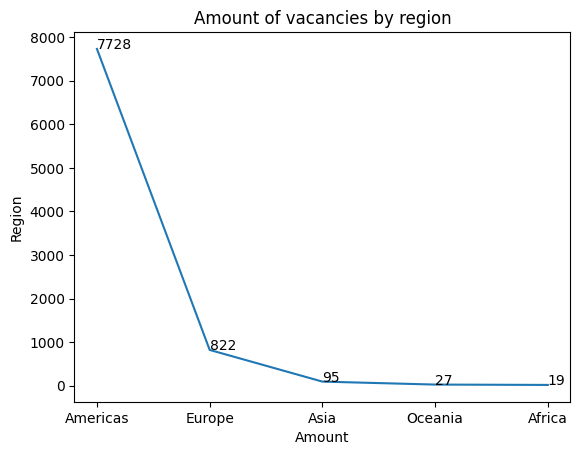

In [ ]:
#Визуализация задачи 5
sql_amount_of_vacancies_by_region = pd.read_sql_query(
    '''SELECT
    ic.region,
    COUNT(*) AS amount_of_vacancies
    FROM data_salaries ds
    INNER JOIN iso_code ic
    ON ds.company_location = ic.name
    GROUP BY ic.region
    ORDER BY amount_of_vacancies DESC''',
    con
)
plt.plot(
    sql_amount_of_vacancies_by_region['region'],
    sql_amount_of_vacancies_by_region['amount_of_vacancies']
)
for key, value in zip(
    sql_amount_of_vacancies_by_region['region'],
    sql_amount_of_vacancies_by_region['amount_of_vacancies']
):
    plt.text(key, value, str(value))
plt.xlabel('Amount')
plt.ylabel('Region')
plt.title('Amount of vacancies by region')
plt.show()

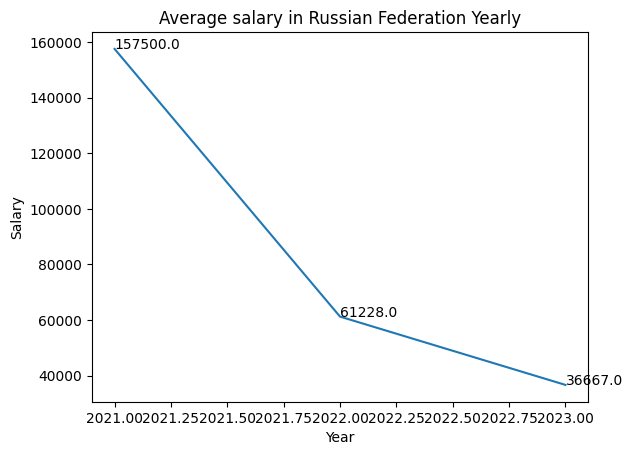

In [ ]:
#Визуализация задачи 6
sql_average_salary_in_russia_yearly = pd.read_sql_query(
    '''SELECT
    work_year,
    COUNT(*) AS vacancies_in_Russia,
    ROUND(AVG(salary_in_usd)) AS average_salary_in_Russia
    FROM data_salaries ds
    WHERE company_location = 'Russian Federation'
    GROUP BY work_year''', con)
plt.plot(
    sql_average_salary_in_russia_yearly['work_year'],
    sql_average_salary_in_russia_yearly['average_salary_in_Russia']
)
for key, value in zip(
    sql_average_salary_in_russia_yearly['work_year'],
    sql_average_salary_in_russia_yearly['average_salary_in_Russia']
):
    plt.text(key, value, str(value))
plt.xlabel('Year')
plt.ylabel('Salary')
plt.title('Average salary in Russian Federation Yearly')
plt.show()

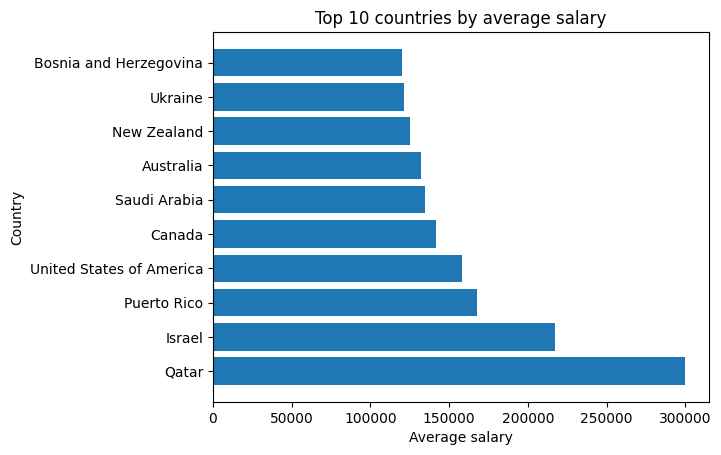

In [ ]:
#Визуализация задачи 7
sql_top_10_countries_by_average_salary = pd.read_sql_query(
    '''SELECT
    company_location,
    ROUND(AVG(salary_in_usd)) AS average_salary,
    COUNT(salary_in_usd) AS quantity_of_vacancies
    FROM data_salaries ds
    GROUP BY company_location
    ORDER BY average_salary DESC
    LIMIT 10''', con)
plt.barh(
    sql_top_10_countries_by_average_salary['company_location'],
    sql_top_10_countries_by_average_salary['average_salary']
)
plt.xlabel('Average salary')
plt.ylabel('Country')
plt.title('Top 10 countries by average salary')
plt.show()

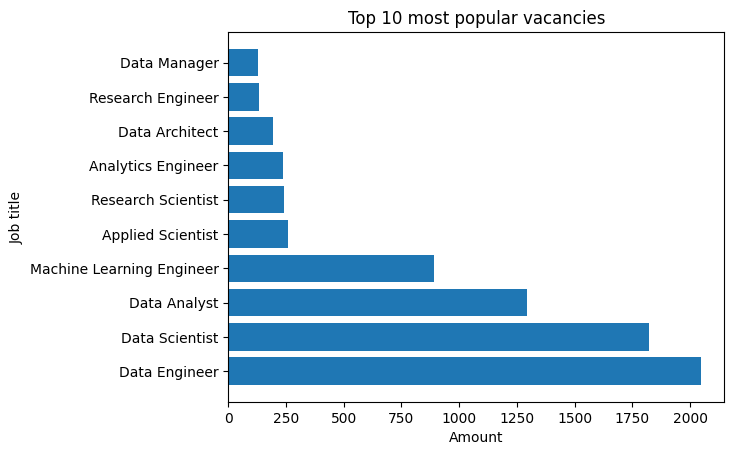

In [ ]:
#Визуализация задачи 8
sql_top_10_most_popular_vacancies = pd.read_sql_query(
    '''SELECT
    job_title,
    COUNT(*) AS quantity_of_vacancies
    FROM data_salaries ds
    GROUP BY job_title
    ORDER BY quantity_of_vacancies DESC
    LIMIT 10''',
    con
)
plt.barh(
    sql_top_10_most_popular_vacancies['job_title'],
    sql_top_10_most_popular_vacancies['quantity_of_vacancies']
)
plt.xlabel('Amount')
plt.ylabel('Job title')
plt.title('Top 10 most popular vacancies')
plt.show()

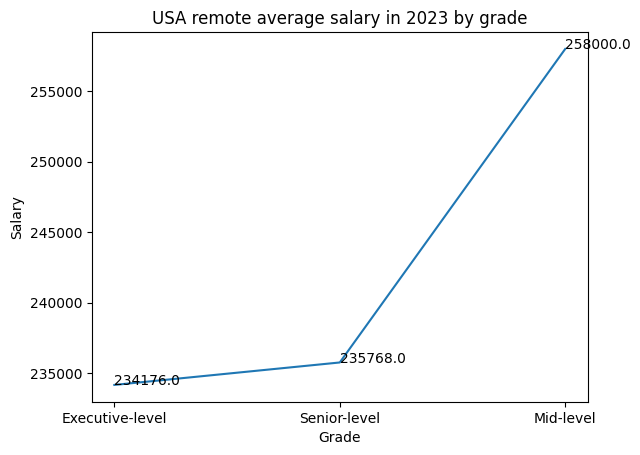

In [ ]:
#Визуализация задачи 9
sql_usa_remote_average_salary_in_2023_by_grade = pd.read_sql_query(
    '''SELECT
    experience_level,
    COUNT(*) AS quantity_of_vacancies,
    ROUND(AVG(average_salary)) AS average_salary_by_exp_level
    FROM
      (SELECT
	      job_title,
	      experience_level,
	      employment_type,
	      remote_ratio,
        ROUND(AVG(salary_in_usd)) AS average_salary
        FROM data_salaries
        WHERE work_year = '2023'
        AND company_location = 'United States of America'
        AND remote_ratio = 'Fully Remote'
        GROUP BY job_title, experience_level, employment_type, remote_ratio
        HAVING average_salary > 200000
        ORDER BY average_salary DESC)
        GROUP BY experience_level
        ORDER BY average_salary_by_exp_level ASC''',
        con
)
plt.plot(
    sql_usa_remote_average_salary_in_2023_by_grade['experience_level'],
    sql_usa_remote_average_salary_in_2023_by_grade['average_salary_by_exp_level']
)
for key, value in zip(
    sql_usa_remote_average_salary_in_2023_by_grade['experience_level'],
    sql_usa_remote_average_salary_in_2023_by_grade['average_salary_by_exp_level']
):
  plt.text(key, value, str(value))
plt.xlabel('Grade')
plt.ylabel('Salary')
plt.title('USA remote average salary in 2023 by grade')
plt.show()